# Подключаем библиотеки

In [1]:
import numpy as np
import scipy.stats as sts
from UltrametricMatrix import ultramatrix
from HierarchyClusteringWithoutLogs import hierarchy
from MinMaxHierarchy import MinMaxHierarchy
from MedianHierarchy import MedianHierarchy
from Linkages import single_linked
from Linkages import complete_linked
from Linkages import group_average_linked
from Linkages import weighted_average_linked
import pandas as pd
import seaborn as sns

Создаем словарик, в котором указываем каждому методу соответствующую функцию

In [2]:
Methods_N_Func = {
    'single_linked': single_linked,
    'complete_linked': complete_linked,
    'group_average_linked': group_average_linked,
    'weighted_average_linked': weighted_average_linked,
    'min_max_linked': MinMaxHierarchy,
    'median_linked': MedianHierarchy
}

# Описание функций

Функция `pipe(points, method)` считает метрики исходя из заданных кластеров и методов

In [3]:
def pipe(points, method):
    if method.__name__ == 'MinMaxHierarchy':
        logs = MinMaxHierarchy(points, metric='euclidean')
    elif method.__name__ == 'MedianHierarchy':
        logs = MedianHierarchy(points, metric='euclidean')
    else:
        logs = hierarchy(points, metric='euclidean', method=method)
    
    start_matrix = logs[1]
    finish_matrix = ultramatrix(logs[0], logs[2])

    max_abs = np.max(np.abs(start_matrix - finish_matrix))

    n_points = len(start_matrix) 
    N_edge = n_points * (n_points - 1) / 2
    norm_sum_abs = np.sum(np.abs(finish_matrix - start_matrix)) / N_edge

    return max_abs, norm_sum_abs

Функция `get_gen_sample(size)` генерирует кластеры

In [4]:
def get_gen_sample(size):
    N = int(size / 3)

    norm1 = sts.norm(1, 0.2)
    norm2 = sts.norm(1.5, 0.1)
    norm3 = sts.norm(2, 0.2)

    x = np.append(norm1.rvs(N), np.append(norm2.rvs(N), norm3.rvs(N), axis=0), axis=0)
    y = np.append(norm1.rvs(N), np.append(norm2.rvs(N), norm3.rvs(N), axis=0), axis=0)

    points = list(zip(x, y))

    return np.array(points)

Функция `times_when_method_better(results, res_column)` создает матрицу, которая показывает соотношение количества раз, когда метрика по указанному в строке методу оказалась меньше, чем метрика по указанному в столбце методу, к общему количеству экспериментов

In [5]:
def times_when_method_better(results):

    ResultsMatrix = pd.DataFrame(columns=results.columns, index=results.columns)

    for col in results.columns:
        for ind in results.columns:
            res = results[results[ind] < results[col]].shape[0] / results.shape[0]
            ResultsMatrix[col][ind] = res

    return ResultsMatrix.astype(float)

# Основаной скрипт

Основной скрипт, который запускает процесс генерации и посчета метрик

In [6]:
MetricsByMethodsForMax = {method_name: [] for method_name in Methods_N_Func.keys()}
MetricsByMethodsForSum = {method_name: [] for method_name in Methods_N_Func.keys()}


size = 1000
sample_size = 20
n_iter = 5
points = get_gen_sample(size)
ssamples = []

for _ in range(n_iter):
    indices = np.random.choice(points.shape[0], size=sample_size, replace=False)
    sample = points[indices]
    ssamples.append(sample)

    for method_name, method_func in Methods_N_Func.items():
        metrics_both = pipe(sample, method_func)
        MetricsByMethodsForMax[method_name].append(metrics_both[0])
        MetricsByMethodsForSum[method_name].append(metrics_both[1])

ResultsForMax = pd.DataFrame(MetricsByMethodsForMax)
ResultsForSum = pd.DataFrame(MetricsByMethodsForSum)

VERSION 18
Distance matrix: 0 step
          0         1         2         3         4         5         6   \
0   0.000000  1.326821  0.968166  0.317056  0.738562  0.898908  0.970033   
1   1.326821  0.000000  0.358656  1.205214  1.039632  0.427918  0.358592   
2   0.968166  0.358656  0.000000  0.860244  0.767632  0.069289  0.031067   
3   0.317056  1.205214  0.860244  0.000000  0.429289  0.794295  0.852060   
4   0.738562  1.039632  0.767632  0.429289  0.000000  0.722189  0.745533   
5   0.898908  0.427918  0.069289  0.794295  0.722189  0.000000  0.076363   
6   0.970033  0.358592  0.031067  0.852060  0.745533  0.076363  0.000000   
7   0.394334  0.933753  0.575347  0.346736  0.554216  0.506070  0.576118   
8   0.208161  1.229469  0.875986  0.455954  0.831153  0.808710  0.884099   
9   0.170822  1.161190  0.802844  0.238424  0.613226  0.733570  0.803301   
10  0.945262  0.445172  0.196910  0.903277  0.898057  0.196055  0.227570   
11  0.932369  0.402151  0.076154  0.804465  0.693103 

# Подсчет результатов

In [7]:
ResultsForMax.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,1.312759,1.312759,0.735414,0.711823,0.656379,0.886460
1,1.400378,1.400378,0.915674,0.743142,0.700189,1.005696
2,1.609603,1.609603,0.947996,0.872875,0.804802,1.042952
3,0.961120,1.831080,1.135930,1.622673,0.705274,0.988047
4,1.494837,1.545911,1.130705,1.105120,0.678926,0.821588


In [8]:
ResultsForSum.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,0.831538,0.951838,0.505103,0.540337,0.541544,0.453752
1,0.665143,1.007967,0.400394,0.432320,0.466993,0.384932
2,0.893318,1.220962,0.554459,0.572388,0.573912,0.552174
3,0.644866,1.592998,0.764273,0.778158,0.475250,0.488740
4,1.014518,1.037486,0.672442,0.673388,0.488527,0.465923


# Матрица сравнения результатов

<AxesSubplot: >

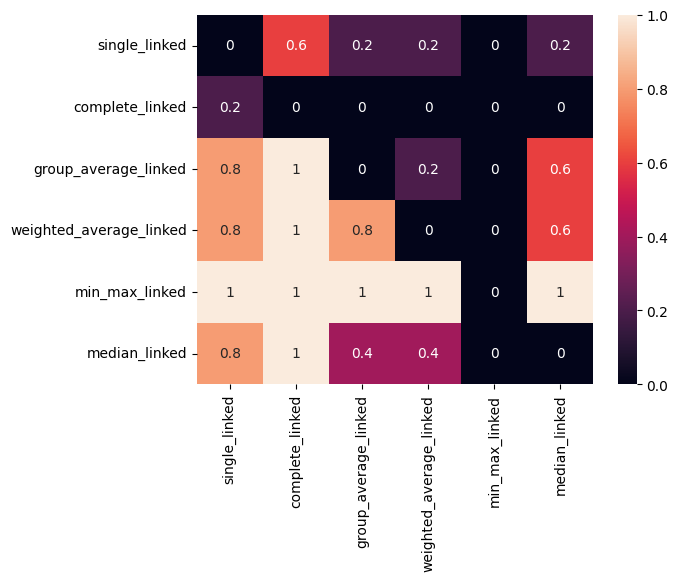

In [9]:
sns.heatmap(times_when_method_better(ResultsForMax), annot=True)

<AxesSubplot: >

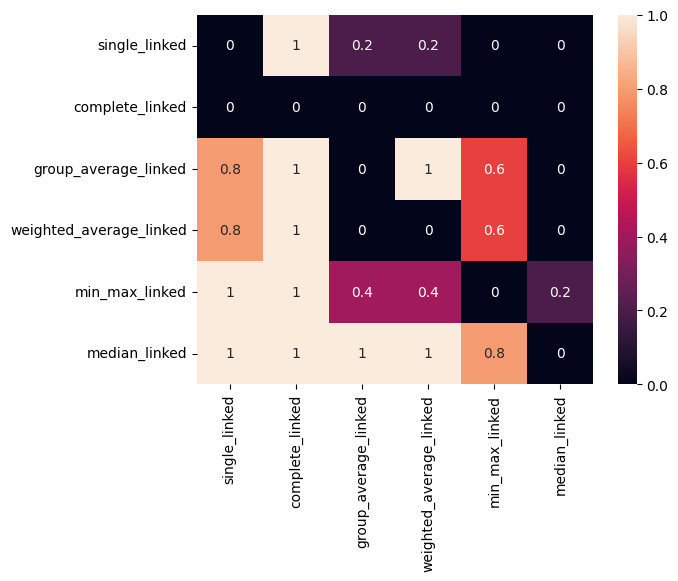

In [10]:
sns.heatmap(times_when_method_better(ResultsForSum), annot=True)